In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot  as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

In [2]:
model= load_model("Water_Model.h5")

<Sequential name=sequential, built=True>
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\jesus\OneDrive\Escritorio\Education\Samsung Inovation Campus\Clases\Asignaciones\Semana 7\Quizz\pandas_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


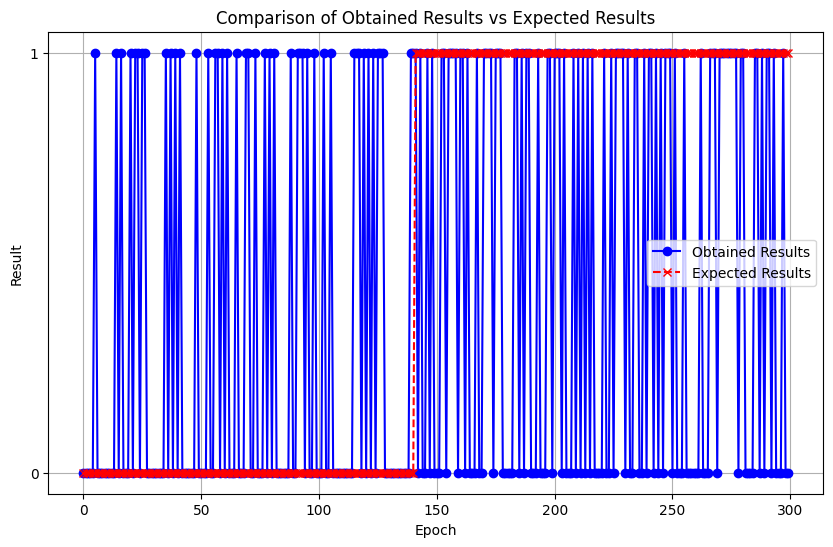

In [6]:
print(model)
#720 (Control) - Salida 1
dato0 = [7.417502636689077,198.70565298813403,24389.36288513361,4.790681389223984,289.3313577693062,366.3707236475444,18.415180455004304,87.99622277162433,3.3912406668716133] 
#2867 - Salida 1
dato1 = [1.130768886836288,266.7449592274032,9929.194809860886,6.011964238184745,352.1532144022425,542.8067817707314,10.974207361682431,65.782453044405,4.771443754534465] 
#2869 - Salida 1
dato2 = [7.1252110755305536,209.7467711974657,16701.56597534472,7.458741450053704,320.50094487053195,404.7045963253844,18.9527967341603,92.34737526315509,3.9080753459125]
#2871 - Salida 0
dato3 = [7.171223722909929,199.16017530273533,13163.031278326584,5.762522398067345,351.2781335939347,436.6024359703054,19.10315199881154,52.57745108743676,2.2090917998705097]
#input_data = np.array([dato0,dato1,dato2,dato3])

training_df = pd.read_csv('Training Records.csv')
testing_df = pd.read_csv('Test Records.csv')

scale_data= training_df[['ph', 'Hardness', 'Solids','Chloramines','Sulfate','Conductivity', 'Organic_carbon','Trihalomethanes','Turbidity']]

# Escalado de entradas
scaler = StandardScaler()
scaler.fit(scale_data)

input_data = testing_df[['ph', 'Hardness', 'Solids','Chloramines','Sulfate','Conductivity', 'Organic_carbon','Trihalomethanes','Turbidity']].to_numpy()
input_data_scaled = scaler.transform(input_data) 

# Predicción
resultado = model.predict(input_data_scaled)
resultado_entero = (resultado>=0.5).astype(int)
#print (resultado_entero)

#-------

# Sample data for demonstration
#epochs = list(range(1, 11))
obtained_results = resultado_entero.tolist()
expected_results = testing_df['Potability'].tolist()

# Create a DataFrame
data = {
    'Obtained Results': obtained_results,
    'Expected Results': expected_results
}
df = pd.DataFrame(data)

# Display the DataFrame
df.to_json('resultados.json', orient='records', lines=True)


#------

# Sample data for demonstration
epochs = list(range(0, 300))
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, obtained_results, marker='o', linestyle='-', color='b', label='Obtained Results')
plt.plot(epochs, expected_results, marker='x', linestyle='--', color='r', label='Expected Results')
plt.title('Comparison of Obtained Results vs Expected Results')
plt.xlabel('Epoch')
plt.ylabel('Result')
plt.yticks([0, 1])  # Ensure the y-axis only shows 0 and 1
plt.legend()
plt.grid(True)
plt.show()